In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read excel file

Consumer_Price_index = pd.read_excel("../00_Data/Original_data/Consumer_Price_index.xlsx")
Consumer_Price_index.head()

,시점,Nationwide Consumer Price Index
0,2024.04,113.99
1,2024.03,113.94
2,2024.02,113.77
3,2024.01,113.15
4,2023.12,112.71


In [3]:
Consumer_Price_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   시점                               160 non-null    float64
 1   Nationwide Consumer Price Index  160 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [4]:
Consumer_Price_index_drop = Consumer_Price_index.dropna()
Consumer_Price_index_drop

,시점,Nationwide Consumer Price Index
0,2024.04,113.990
1,2024.03,113.940
2,2024.02,113.770
3,2024.01,113.150
4,2023.12,112.710
...,...,...
155,2011.05,89.497
156,2011.04,89.325
157,2011.03,89.238
158,2011.02,88.892


In [5]:
Consumer_Price_index_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   시점                               160 non-null    float64
 1   Nationwide Consumer Price Index  160 non-null    float64
dtypes: float64(2)
memory usage: 2.6 KB


In [6]:
Consumer_Price_index_drop.describe()

,시점,Nationwide Consumer Price Index
count,160.000000,160.000000
mean,2017.239000,98.656000
std,3.863316,6.430109
min,2011.010000,88.288000
25%,2014.047500,94.118500
50%,2017.085000,97.665000
75%,2020.342500,100.815000
max,2024.040000,113.990000


In [7]:
Consumer_Price_index_drop.dtypes

시점                                 float64
Nationwide Consumer Price Index    float64
dtype: object

In [8]:
from datetime import datetime, timedelta
from scipy.interpolate import interp1d

# Given monthly data
Consumer_Price_index_drop = Consumer_Price_index_drop.rename(columns={'시점': 'Date'})
Consumer_Price_index_drop['Date'] = Consumer_Price_index_drop['Date'].astype(str)
monthly_data = Consumer_Price_index_drop.values

# Convert year-month formatted strings to date objects
dates = [datetime.strptime(year_month, "%Y.%m") for year_month, _ in monthly_data]

# Values of monthly data
values = [value for _, value in monthly_data]

# Sort date and value data by date
sorted_indices = np.argsort(dates)
sorted_dates = [dates[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

# Create an interpolation function
f = interp1d([date.timestamp() for date in sorted_dates], sorted_values, kind='linear')

# Generate interpolated daily data
start_date = sorted_dates[0]
end_date = sorted_dates[-1]

daily_dates = []
current_date = start_date
while current_date <= end_date:
    daily_dates.append(current_date)
    current_date += timedelta(days=1)

daily_values = [f(date.timestamp()) for date in daily_dates]

# Print the result
daily_data = list(zip(daily_dates, daily_values))

interpolation_function_Consumer_Price_index_drop = pd.DataFrame(daily_data, columns=Consumer_Price_index_drop.columns)

interpolation_function_Consumer_Price_index_drop['Date'] = interpolation_function_Consumer_Price_index_drop['Date'].dt.strftime('%Y-%m-%d')

interpolation_function_Consumer_Price_index_drop


,Date,Nationwide Consumer Price Index
0,2011-01-01,90.448
1,2011-01-02,90.3978064516129
2,2011-01-03,90.3476129032258
3,2011-01-04,90.29741935483871
4,2011-01-05,90.24722580645161
...,...,...
4835,2024-03-28,113.98354838709677
4836,2024-03-29,113.98516129032258
4837,2024-03-30,113.98677419354838
4838,2024-03-31,113.98838709677419


Text(0, 0.5, 'Nationwide Consumer Price Index')

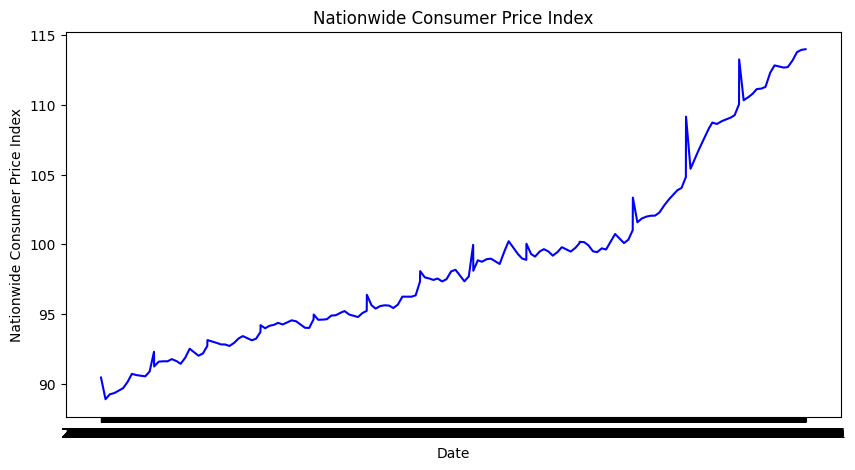

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(interpolation_function_Consumer_Price_index_drop['Date'], interpolation_function_Consumer_Price_index_drop['Nationwide Consumer Price Index'], color='blue')
plt.title('Nationwide Consumer Price Index')
plt.xlabel('Date')
plt.ylabel('Nationwide Consumer Price Index')

In [10]:
interpolation_function_Consumer_Price_index_drop.to_excel("../00_Data/Transformed_data/interpolation_function_Consumer_Price_index_drop.xlsx")